In [2]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
mpl.rc('lines',linewidth = 1.5)
mpl.rc('font',size = 12)
mpl.rc('axes',labelsize = 14, linewidth=1.25)
mpl.rc('xtick',labelsize = 14)
mpl.rc('ytick',labelsize = 14)
# enable math fonts
mpl.rc('mathtext', default = 'regular')

In [4]:
exep = Table.read("DI_STARS_EXEP_2024.11.25_10.26.38.votable")
exep

tic_id,hip_name,hip_compname,hd_name,hr_name,gj_name,constellation,hostname,sy_dist,ra,dec,sy_plx,sy_plxerr,sy_plx_reflink,sy_vmag,sy_vmagerr,sy_vmag_reflink,sy_bvmag,sy_bvmagerr,sy_bvmag_reflink,sy_rcmag,sy_rcmag_reflink,st_spectype,st_spectype_reflink,st_teff,st_tefferr,st_teff_reflink,st_lum,st_lumerr,st_lum_reflink,st_rad,st_diam,st_mass,st_met,st_meterr,st_met_reflink,st_logg,st_loggerr,st_logg_reflink,st_log_rhk,st_log_rhk_reflink,st_eei_orbsep,st_eei_angsep,st_etwin_bratio,st_etwin_rcmag,st_eei_orbper,st_etwin_rvamp,st_etwin_astamp,wds_designation,wds_comp,wds_sep,wds_deltamag,sy_disks_flag,sy_disks_flag_reflink,sy_planets_flag,sy_pnum,target_group
,,,,,,,,pc,deg,deg,mas,mas,,mag,mag,,mag,mag,,mag,,,,K,K,,log(Lsun),log(Lsun),,,,,dex,dex,,log(cm/s2),log(cm/s2),,,,,,,,,,,,,,,,,,,
object,object,object,object,object,object,object,object,float64,float32,float32,float64,float64,object,float64,float64,object,float64,float64,object,float64,object,object,object,float64,float64,object,float64,float64,object,float64,float64,float64,float64,float64,object,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,object,object,object,object,object
"<a href=""https://exoplanetarchive.ipac.caltech.edu/overview/TIC 417762326"" target=_blank>TIC 417762326</a>",HIP 42438,,HD 72905,HR 3391,GJ 311,3 UMa,3 Ursae Majoris A,14.4388,129.7987671,65.0209045,69.2576,0.0485,"<a href=""https://ui.adsabs.harvard.edu/abs/2022yCat.1355....0G/abstract"" target=_blank>2022yCat.1355....0G</a>",5.63,0.01,"<a href=""https://ui.adsabs.harvard.edu/abs/1997HIP...C......0E/abstract"" target=_blank>1997HIP...C......0E</a>",0.618,0.003,"<a href=""https://ui.adsabs.harvard.edu/abs/1997HIP...C......0E/abstract"" target=_blank>1997HIP...C......0E</a>",5.26,"<a href=""https://ui.adsabs.harvard.edu/abs/2010PASP..122.1437P/abstract"" target=_blank>2010PASP..122.1437P</a>",G0.5V Fe-0.5,"<a href=""https://ui.adsabs.harvard.edu/abs/2001AJ....121.2148G/abstract"" target=_blank>2001AJ....121.2148G</a>",5893.0,14.0,"<a href=""https://ui.adsabs.harvard.edu/abs/2022A&A...663A...4S/abstract"" target=_blank>2022A&A...663A...4S</a>",-0.0118,0.0118,"<a href=""https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract"" target=_blank>2019AJ....158..138S</a>",0.946,0.61,1.08,-0.07,0.02,"<a href=""https://ui.adsabs.harvard.edu/abs/2022A&A...663A...4S/abstract"" target=_blank>2022A&A...663A...4S</a>",4.53,0.03,"<a href=""https://ui.adsabs.harvard.edu/abs/2022A&A...663A...4S/abstract"" target=_blank>2022A&A...663A...4S</a>",-4.375,"<a href=""https://ui.adsabs.harvard.edu/abs/1996ApJ...457L..99B/abstract"" target=_blank>1996ApJ...457L..99B</a>",0.987,68.32,1.19e-10,30.07,345.2,8.74,0.191,,,--,--,Y,"<a href=""https://ui.adsabs.harvard.edu/abs/2008ApJ...674.1086T/abstract"" target=_blank>2008ApJ...674.1086T</a>",N,0,B
"<a href=""https://exoplanetarchive.ipac.caltech.edu/overview/TIC 355127594"" target=_blank>TIC 355127594</a>",HIP 44897,,HD 78366,HR 3625,GJ 334.2,,HD 78366,18.9498,137.2127991,33.8822174,52.7709,0.0309,"<a href=""https://ui.adsabs.harvard.edu/abs/2022yCat.1355....0G/abstract"" target=_blank>2022yCat.1355....0G</a>",5.962,0.001,"<a href=""https://ui.adsabs.harvard.edu/abs/1998A&AS..129..431H/abstract"" target=_blank>1998A&AS..129..431H</a>",0.585,0.007,"<a href=""https://ui.adsabs.harvard.edu/abs/1997HIP...C......0E/abstract"" target=_blank>1997HIP...C......0E</a>",5.59,"<a href=""https://ui.adsabs.harvard.edu/abs/2010PASP..122.1437P/abstract"" target=_blank>2010PASP..122.1437P</a>",G0IV-V,"<a href=""https://ui.adsabs.harvard.edu/abs/2003AJ....126.2048G/abstract"" target=_blank>2003AJ....126.2048G</a>",5992.0,20.0,"<a href=""https://ui.adsabs.harvard.edu/abs/2022A&A...663A...4S/abstract"" target=_blank>2022A&A...663A...4S</a>",0.1029,0.0131,"<a href=""https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract"" target=_blank>2019AJ....158..138S</a>",1.045,0.513,1.08,0.04,0.02,"<a href=""https://ui.ad

In [11]:
#exep['wds_sep']
#exep['wds_deltamag']

In [5]:
exep['wds_a'] = exep['wds_sep']*exep['sy_dist']

wide = exep['wds_sep']>=10
medium = (exep['wds_sep']<10) & (exep['wds_sep']>=5)
close = (exep['wds_sep']<5) & (exep['wds_a']>1)

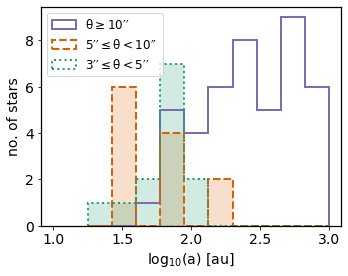

In [15]:
plt.figure(figsize=(5,4))
myr=(1.25,3)

plt.hist(np.log10(exep['wds_a'][wide]), range=myr, fc="none", ec='#7570b3', lw=2, histtype='step', label=r'$\theta \geq 10{\prime\prime}$')
plt.hist(np.log10(exep['wds_a'][medium]), range=myr, fc="#d95f02", ec='#d95f02', ls='--', lw=2, alpha=0.2, histtype='stepfilled')
plt.hist(np.log10(exep['wds_a'][medium]), range=myr, fc="none", ec='#d95f02', ls='--', lw=2, histtype='step', label=r'$5{\prime\prime}\leq\theta<10{\prime\prime}$')
plt.hist(np.log10(exep['wds_a'][close]), range=myr, fc="#1b9e77", ec='#1b9e77', ls=':', lw=2, alpha=0.2, histtype='stepfilled')
plt.hist(np.log10(exep['wds_a'][close]), range=myr, fc="none", ec='#1b9e77', ls=':', lw=2, histtype='step', label=r'$3{\prime\prime}\leq\theta<5{\prime\prime}$')

plt.xlim(1-.0875,3.0875)
plt.xlabel(r"$log_{10}(a)$ [au]")
plt.ylabel("no. of stars")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('exep.png', dpi=250)

In [90]:
len(exep[exep['wds_a']<100])

36

In [93]:
len(exep[ (exep['wds_a']>100) & (exep['wds_a']<600) ])

30

In [7]:
(50/12)**(1/3)

1.6091489743427163